In [125]:

from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

!ls '/content/drive'

MyDrive


In [127]:
#Give dataset path
train_path = '/content/drive/MyDrive/scdata/SKINCANCER DATASET/train'
test_path = '/content/drive/MyDrive/scdata/SKINCANCER DATASET/test'


In [128]:
IMAGE_SIZE = (224, 224)

In [129]:
IMAGE_SIZE

(224, 224)

Working with 1446 images
Image examples: 
1677.jpg


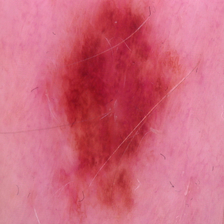

1455.jpg


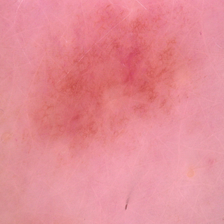

1556.jpg


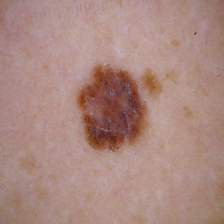

200.jpg


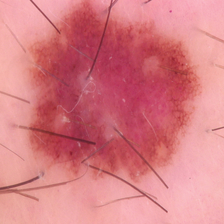

1526.jpg


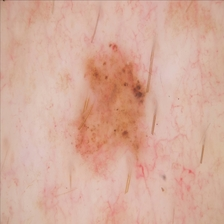

1717.jpg


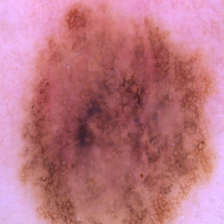

1762.jpg


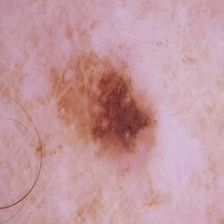

1588.jpg


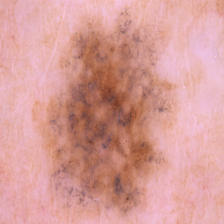

1446.jpg


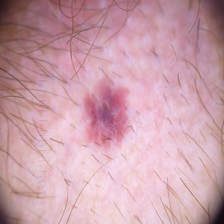

1597.jpg


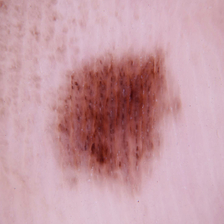

In [130]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [131]:
vgg = VGG16(input_shape= (224,224,3), weights='imagenet', include_top=False)


In [132]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_7')>

In [134]:
for layer in vgg.layers:
  layer.trainable = False

In [135]:

folders = glob('/content/drive/MyDrive/scdata/SKINCANCER DATASET/train/*')
print(len(folders))

2


In [136]:

from tensorflow.keras.optimizers import Adam

x = Flatten()(vgg.output)

x = Dense(1024, activation = 'relu')(x)

x = Dropout(0.2)(x)                  

x = Dense  (1, activation = 'sigmoid')(x)  
model = Model( vgg.input, x) 
l_rate = 0.001
model.compile(optimizer = Adam(lr=l_rate), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [137]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [138]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [139]:
BATCH_SIZE=32
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = IMAGE_SIZE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'binary')

Found 2643 images belonging to 2 classes.


In [140]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 666 images belonging to 2 classes.


In [141]:
import tensorflow as tf

from keras import optimizers
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )


In [ ]:
EPOCHS=15
history = model.fit_generator(train_set,
                              steps_per_epoch=train_set.samples//train_set.batch_size,
                              epochs=EPOCHS,
                              validation_data=test_set,
                              validation_steps=test_set.samples//test_set.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
82/82 [==============================] - 1491s 18s/step - loss: 1.2189 - accuracy: 0.7108 - val_loss: 0.4227 - val_accuracy: 0.7953
Epoch 2/15
82/82 [==============================] - 1484s 18s/step - loss: 0.4068 - accuracy: 0.8001 - val_loss: 0.4078 - val_accuracy: 0.8109
Epoch 3/15
82/82 [==============================] - 1496s 18s/step - loss: 0.3739 - accuracy: 0.8223 - val_loss: 0.4136 - val_accuracy: 0.8047
Epoch 4/15
82/82 [==============================] - 1510s 18s/step - loss: 0.3623 - accuracy: 0.8211 - val_loss: 0.4054 - val_accuracy: 0.8000
Epoch 5/15
82/82 [==============================] - 1505s 18s/step - loss: 0.3686 - accuracy: 0.8196 - val_loss: 0.3739 - val_accuracy: 0.8234
Epoch 6/15
82/82 [==============================] - 1539s 19s/step - loss: 0.3615 - accuracy: 0.8296 - val_loss: 0.3539 - val_accuracy: 0.8219
Epoch 7/15
82/82 [==============================] - 1499s 18s/step - loss: 0.3480 - accuracy: 0.8334 - val_loss: 0.4836 - val_accuracy: 0.7641

In [1]:
### copy paste the graph code from final document 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored